### Analysis of Training and Test Statistics

Takes the training_stats.pkl which is produced when using the train method over several epochs and displays the statistics for evaluation.

In [104]:

import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
import seaborn as sns

In [115]:
# load training stats from training_stats.pkl
filename = 'training_stats.pkl'
if os.path.exists(filename):
    with open(filename, 'rb') as f:
        stats = pickle.load(f)

# take only the first 200 runs
stats['results'] = stats['results'][:200]
stats['poachers_caught_pct'] = stats['poachers_caught_pct'][:200]
stats['animals_alive_pct'] = stats['animals_alive_pct'][:200]
stats['steps_per_run'] = stats['steps_per_run'][:200]

# Create arrays to store the result counts
victories = np.zeros(len(stats['results']))
defeats = np.zeros(len(stats['results']))
timeouts = np.zeros(len(stats['results']))
total_runs = np.array([i+1 for i in range(len(stats['results']))])

# Count results for each run
for i, result in enumerate(stats['results']):
    if result == 'victory':
        victories[i] = 1
    elif result == 'defeat':
        defeats[i] = 1
    elif result == 'timeout':
        timeouts[i] = 1

# Calculate cumulative sums
cumulative_victories = np.cumsum(victories)
cumulative_defeats = np.cumsum(defeats)
cumulative_timeouts = np.cumsum(timeouts)

# Calculate relative cumulative percentages
relative_victories = cumulative_victories / total_runs * 100
relative_defeats = cumulative_defeats / total_runs * 100
relative_timeouts = cumulative_timeouts / total_runs * 100


In [116]:
print(stats.keys())

dict_keys(['results', 'poachers_caught_pct', 'animals_alive_pct', 'steps_per_run', 'victories', 'defeats', 'timeouts'])


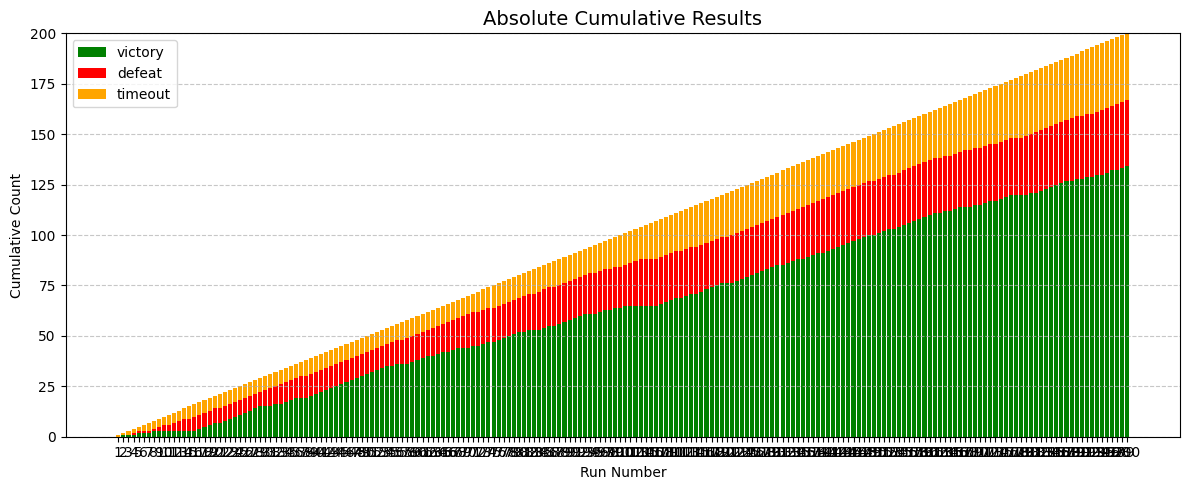

In [117]:
# Set colors for different results
color_map = {'victory': 'green', 'defeat': 'red', 'timeout': 'orange'}
colors = [color_map[result] for result in stats['results']]

# Plot 1: Absolute cumulative results as stacked bars
plt.figure(figsize=(12, 5))

plt.bar(total_runs, cumulative_victories, color=color_map['victory'], label='Victories')
plt.bar(total_runs, cumulative_defeats, bottom=cumulative_victories, color=color_map['defeat'], label='Defeats')
plt.bar(total_runs, cumulative_timeouts, bottom=cumulative_victories + cumulative_defeats, color=color_map['timeout'], label='Timeouts')

plt.title('Absolute Cumulative Results', fontsize=14)
plt.xlabel('Run Number')
plt.ylabel('Cumulative Count')
plt.xticks(total_runs)
plt.ylim(0, len(stats['results']))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the colors
legend_elements = [Patch(facecolor=color, label=result) 
                  for result, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

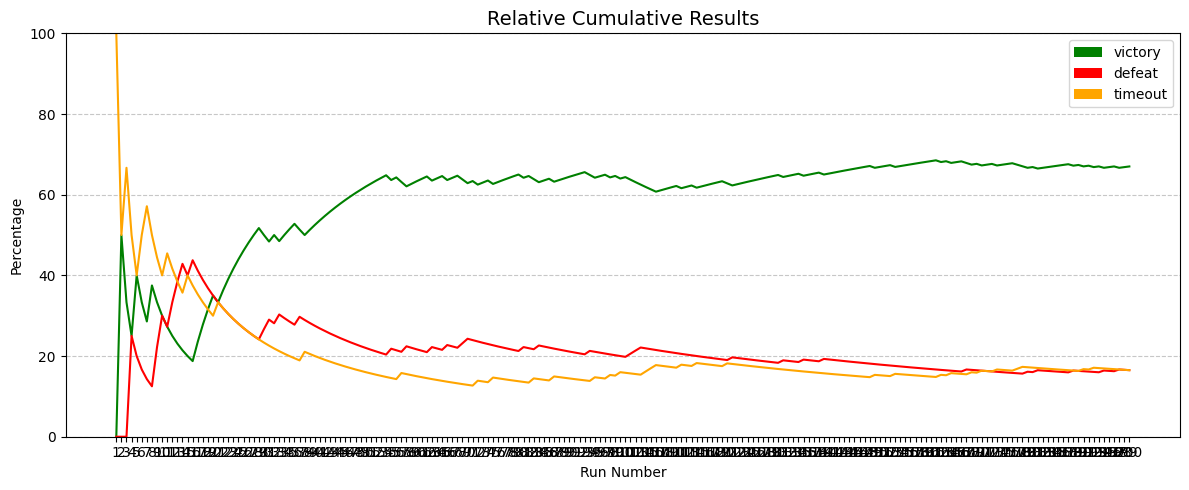

In [118]:
# Plot 2: Relative cumulative results as line plots
plt.figure(figsize=(12, 5))
plt.plot(total_runs, relative_victories, color=color_map['victory'], label='Victory %')
plt.plot(total_runs, relative_defeats, color=color_map['defeat'], label='Defeat %')
plt.plot(total_runs, relative_timeouts, color=color_map['timeout'], label='Timeout %')

plt.title('Relative Cumulative Results', fontsize=14)
plt.xlabel('Run Number')
plt.ylabel('Percentage')
plt.xticks(total_runs)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

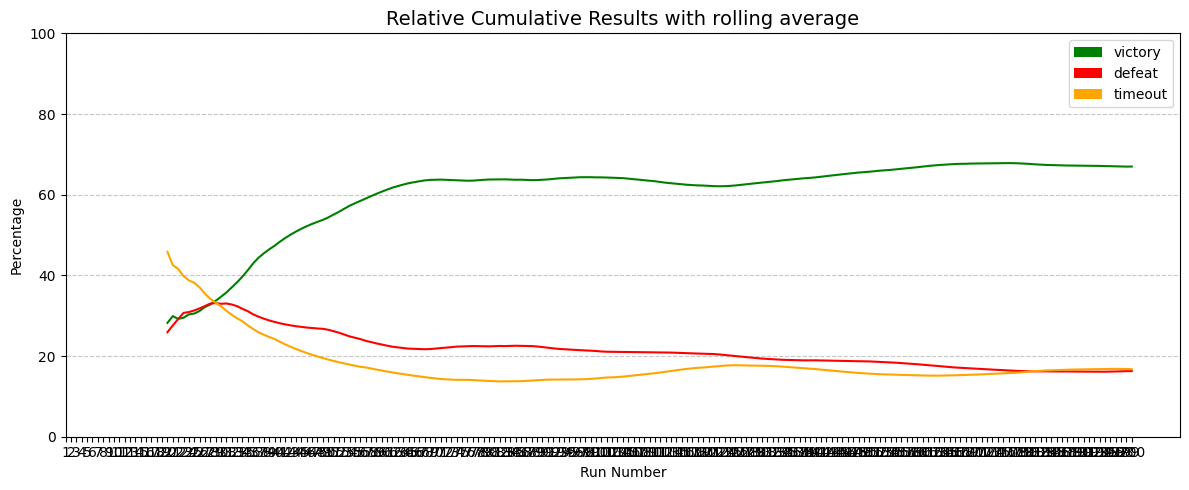

In [119]:
# Plot 2: Relative cumulative results as line plots

# calculate rolling averages for smoother lines
window_size = 20
relative_victories_smooth = pd.Series(relative_victories).rolling(window=window_size).mean()
relative_defeats_smooth = pd.Series(relative_defeats).rolling(window=window_size).mean()
relative_timeouts_smooth = pd.Series(relative_timeouts).rolling(window=window_size).mean()

plt.figure(figsize=(12, 5))
plt.plot(total_runs, relative_victories_smooth, color=color_map['victory'], label='Victory %')
plt.plot(total_runs, relative_defeats_smooth, color=color_map['defeat'], label='Defeat %')
plt.plot(total_runs, relative_timeouts_smooth, color=color_map['timeout'], label='Timeout %')

plt.title('Relative Cumulative Results with rolling average', fontsize=14)
plt.xlabel('Run Number')
plt.ylabel('Percentage')
plt.xticks(total_runs)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

Average number of steps taken to win: 965.31


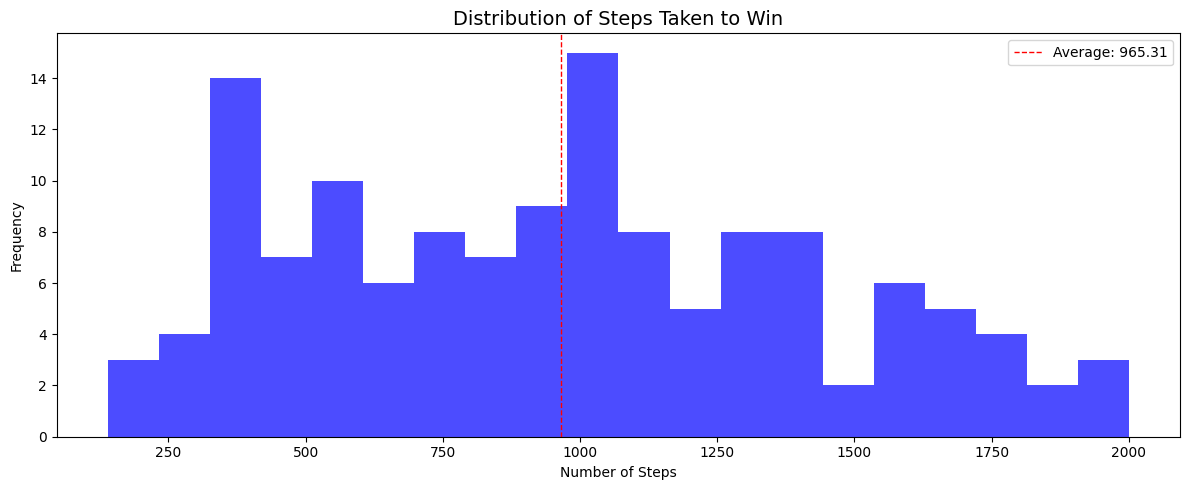

In [120]:
# For successful runs, calculate the average number of steps taken to win
successful_runs = [i for i, result in enumerate(stats['results']) if result == 'victory']
successful_steps = [stats['steps_per_run'][i] for i in successful_runs]
average_steps = np.mean(successful_steps) if successful_steps else 0

print(f"Average number of steps taken to win: {average_steps:.2f}")

# Plot 3: Distribution of steps taken to win
plt.figure(figsize=(12, 5))
plt.hist(successful_steps, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Steps Taken to Win', fontsize=14)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.axvline(average_steps, color='red', linestyle='dashed', linewidth=1, label=f'Average: {average_steps:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

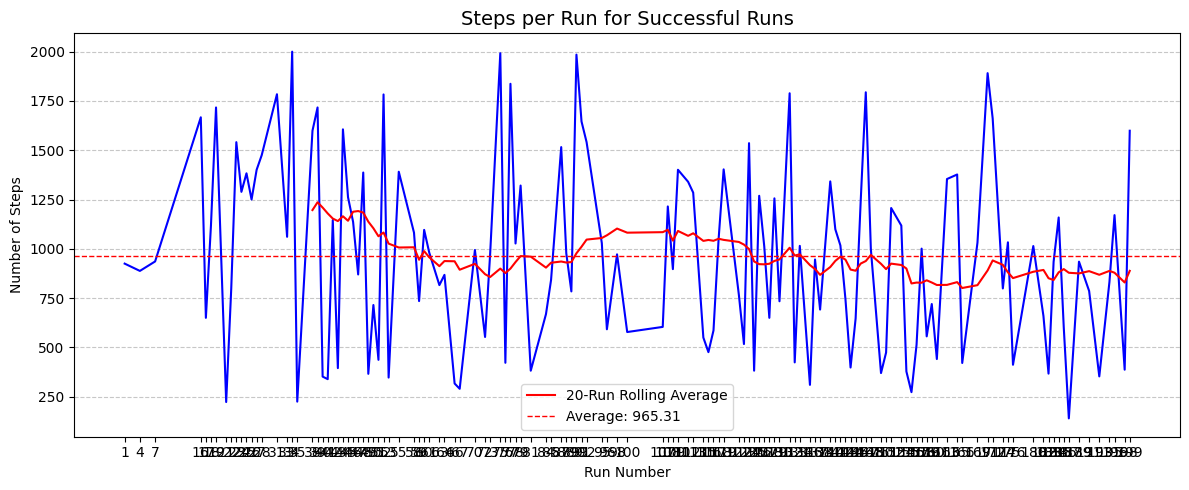

In [124]:
# Plot Development of steps per run over time for successful runs
# calculate rolling average of steps for successful runs
rolling_steps = pd.Series(successful_steps).rolling(window=20).mean()
successful_steps_df = pd.DataFrame({'Run': successful_runs, 'Steps': successful_steps, 'Rolling_Avg': rolling_steps})
plt.figure(figsize=(12, 5))
plt.plot(successful_steps_df['Run'], successful_steps_df['Steps'], linestyle='-', color='blue')
plt.plot(successful_steps_df['Run'], successful_steps_df['Rolling_Avg'], color='red', label='20-Run Rolling Average')
plt.title('Steps per Run for Successful Runs', fontsize=14)
plt.xlabel('Run Number')
plt.ylabel('Number of Steps')
plt.axhline(average_steps, color='red', linestyle='dashed', linewidth=1, label=f'Average: {average_steps:.2f}')
plt.xticks(successful_steps_df['Run'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Average percentage of animals that survived: 0.53%


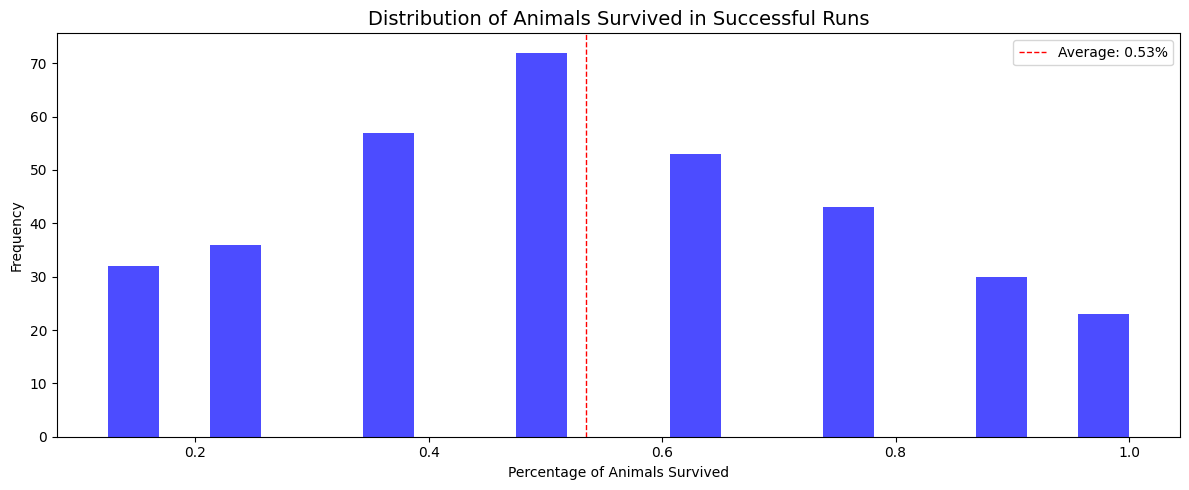

In [111]:
# For successful runs, plot the percentage of animals that survived
successful_survival = [stats['animals_alive_pct'][i] for i in successful_runs]
average_survival = np.mean(successful_survival) if successful_survival else 0
print(f"Average percentage of animals that survived: {average_survival:.2f}%")

plt.figure(figsize=(12, 5))
plt.hist(successful_survival, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Animals Survived in Successful Runs', fontsize=14)
plt.xlabel('Percentage of Animals Survived')
plt.ylabel('Frequency')
plt.axvline(average_survival, color='red', linestyle='dashed', linewidth=1, label=f'Average: {average_survival:.2f}%')
plt.legend()
plt.tight_layout()
plt.show()

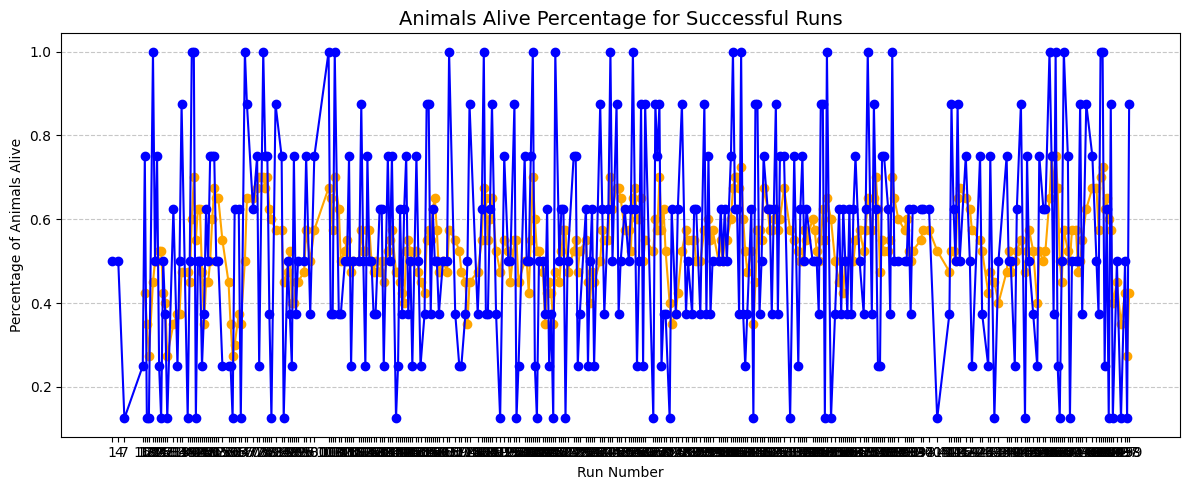

In [112]:
# Plot Development of animals alive percentage over time for successful runs

# calculate rolling average of survival percentage
rolling_window = 5  # Adjust the window size as needed
successful_survival_rolling = pd.Series(successful_survival).rolling(window=rolling_window).mean().tolist()
successful_survival_df = pd.DataFrame({'Run': successful_runs, 'Survival': successful_survival, 'Rolling Average': successful_survival_rolling})

plt.figure(figsize=(12, 5))
plt.plot(successful_survival_df['Run'], successful_survival_df['Rolling Average'], marker='o', linestyle='-', color='orange', label='Rolling Average')
plt.plot(successful_survival_df['Run'], successful_survival_df['Survival'], marker='o', linestyle='-', color='blue')
plt.title('Animals Alive Percentage for Successful Runs', fontsize=14)
plt.xlabel('Run Number')
plt.ylabel('Percentage of Animals Alive')
plt.xticks(successful_survival_df['Run'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()